# Resampling and regularization

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
DATAPATH = 'Advertising.csv'
data = pd.read_csv(DATAPATH, index_col=0)
data.head()



,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [23]:
def scatter_plot(feature):
  plt.figure(figsize=(8, 4))
  plt.scatter(data[feature], data['sales'], c='black')
  plt.xlabel(f'Money spent on {feature} ads ($)')
  plt.ylabel('Sales (k$)')
  plt.show()


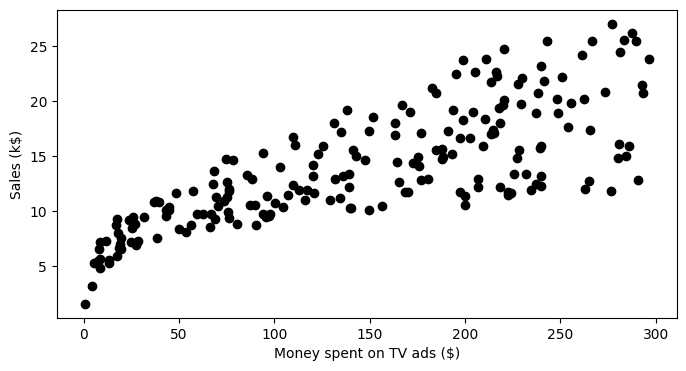

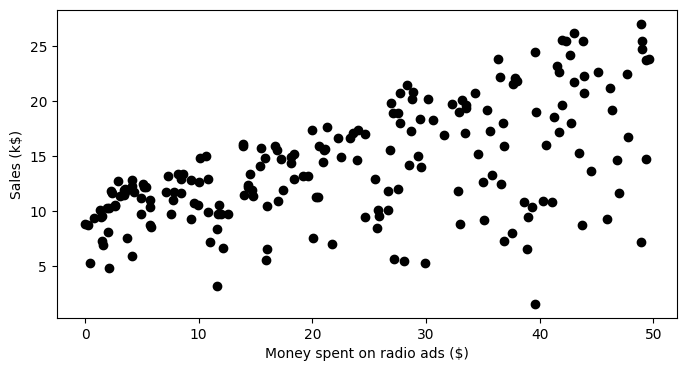

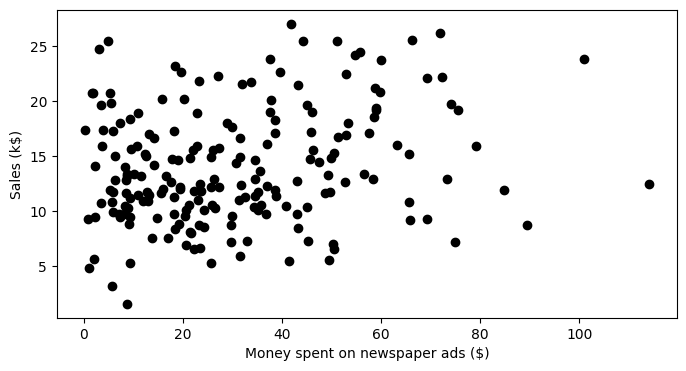

In [24]:
scatter_plot('TV')
scatter_plot('radio')
scatter_plot('newspaper')

## Baseline model

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [26]:
X = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1, 1)

In [27]:
lin_reg = LinearRegression()

In [28]:
MSEs = cross_val_score(lin_reg,  X, y, scoring = 'neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)
print(-mean_MSE)

3.0729465971002106


# Regularization

# Ridge regression

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [30]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters,  scoring = 'neg_mean_squared_error', cv=5)

ridge_regressor.fit(X, y);

In [31]:
print(ridge_regressor.best_params_)
print(-ridge_regressor.best_score_)

{'alpha': 20}
3.072671338341143


# Lasso

In [32]:
from sklearn.linear_model import Lasso

In [33]:
lasso = Lasso(tol=0.05)

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters,  scoring = 'neg_mean_squared_error', cv=5)

lasso_regressor.fit(X, y);

In [34]:
print(lasso_regressor.best_params_)
print(-lasso_regressor.best_score_)

{'alpha': 1}
3.035998320911191
